In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ibov.csv')
companies = data['tickers'].tolist()
print(companies)

['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'WEGE3.SA']


In [3]:
company_data = pd.DataFrame(columns=['Ticker', 'Price', 'Earnings'])
print(company_data)

Empty DataFrame
Columns: [Ticker, Price, Earnings]
Index: []


In [4]:
# Get price and earnings data for each company and populate the DataFrame
for company in companies:
    ticker = yf.Ticker(company)
    price = ticker.history(period="1d")["Close"].iloc[0]
    earnings = ticker.info["trailingPE"]
    company_data = company_data.append({'Ticker': company, 'Price': price, 'Earnings': earnings}, ignore_index=True)

# Sort the DataFrame by earnings in ascending order
sorted_data = company_data.sort_values(by='Earnings')

/var/folders/0_/jzmb8jld461g6hy1kq23tb6w0000gn/T/ipykernel_2262/646761411.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  company_data = company_data.append({'Ticker': company, 'Price': price, 'Earnings': earnings}, ignore_index=True)
/var/folders/0_/jzmb8jld461g6hy1kq23tb6w0000gn/T/ipykernel_2262/646761411.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  company_data = company_data.append({'Ticker': company, 'Price': price, 'Earnings': earnings}, ignore_index=True)
/var/folders/0_/jzmb8jld461g6hy1kq23tb6w0000gn/T/ipykernel_2262/646761411.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  company_data = company_data.append({'Ticker': company, 'Price': price, 'Earnings': earnings}, ignore_index=True)
/var/folders/0_/

### Simple evaluation method

- P/E price over earnings
- Attention, for very low P/Ls:
   Imagine a company that works with paper manufacturing,
   he has a farm where he plants the trees that supply the raw material for the manufacture of papers.
   For some reason a farm is sold generating a large inflow of capital into the company.
   However, the company's operational activity is not the sale of farms, but the manufacture of paper.
   Soon the company records it in the statement of income for the year as Profit.
   Causing the P/E to be skewed.

1. very cheap P/E less than or close to 1
2. cheap P/L less than 8
3. market average between 8 and 15
4. expensive above 15

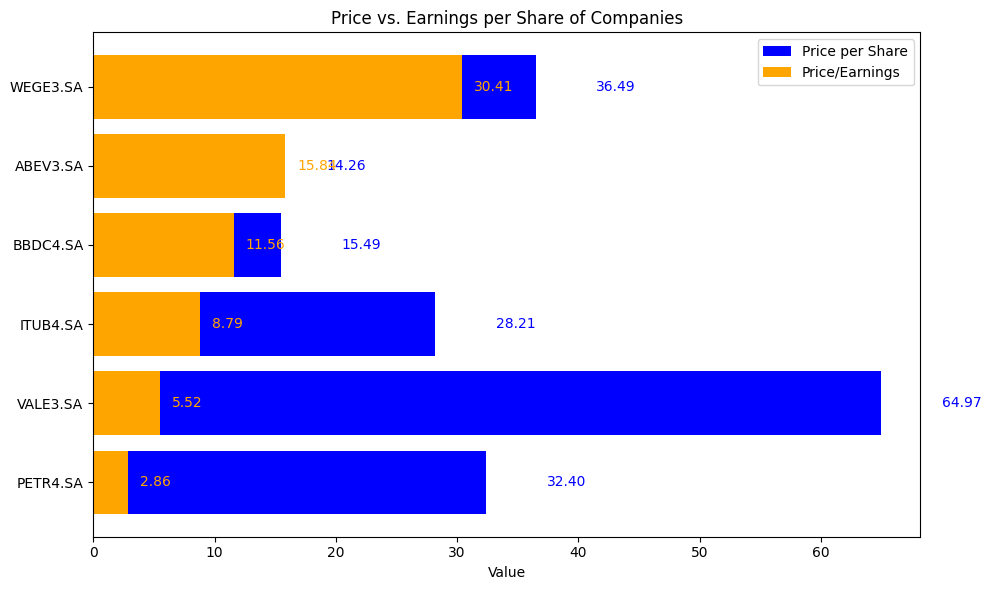

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))
bars_price = plt.barh(sorted_data['Ticker'], sorted_data['Price'], color='blue', label='Price per Share')
bars_earnings = plt.barh(sorted_data['Ticker'], sorted_data['Earnings'], color='orange', label='Price/Earnings')

# Display price values on the price bars
for bar in bars_price:
    value = bar.get_width()
    plt.text(value + 5, bar.get_y() + bar.get_height() / 2, f"{value:.2f}", va='center', color='blue')

# Display earnings values on the earnings bars
for bar in bars_earnings:
    value = bar.get_width()
    plt.text(value + 1, bar.get_y() + bar.get_height() / 2, f"{value:.2f}", va='center', color='orange')

plt.xlabel('Value')
plt.title('Price vs. Earnings per Share of Companies')
plt.legend()
plt.tight_layout()

plt.show()

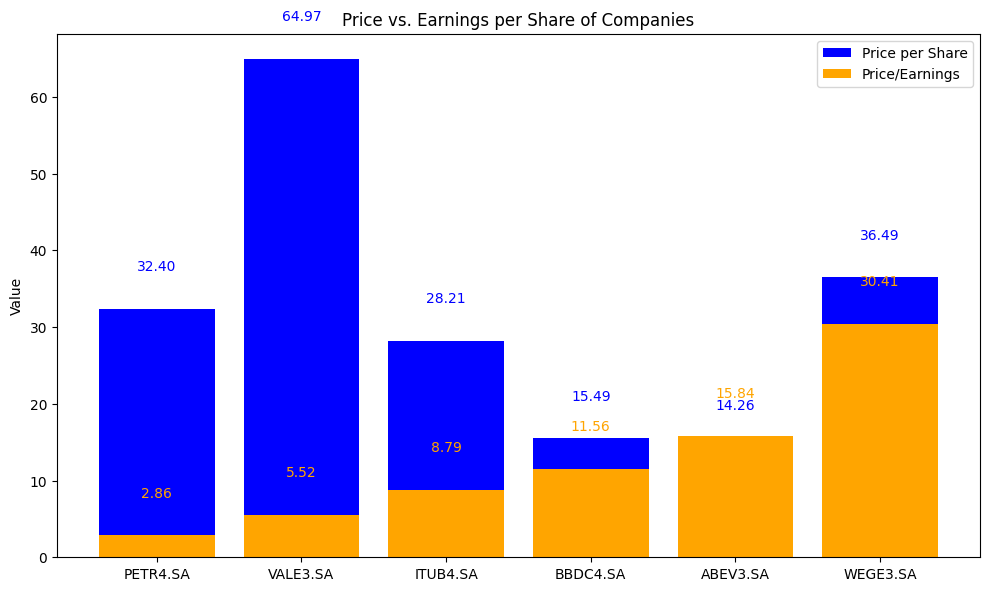

In [6]:
# Sort the DataFrame by earnings in ascending order
sorted_data = company_data.sort_values(by='Earnings')

# Create the plot
plt.figure(figsize=(10, 6))
bars_price = plt.bar(sorted_data['Ticker'], sorted_data['Price'], color='blue', label='Price per Share')
bars_earnings = plt.bar(sorted_data['Ticker'], sorted_data['Earnings'], color='orange', label='Price/Earnings')

# Display price values on the price bars
for bar in bars_price:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, value + 5, f"{value:.2f}", ha='center', color='blue')

# Display earnings values on the earnings bars
for bar in bars_earnings:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, value + 5, f"{value:.2f}", ha='center', color='orange')

plt.ylabel('Value')
plt.title('Price vs. Earnings per Share of Companies')
plt.legend()
plt.tight_layout()

plt.show()